In [3]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.stats import sem
import pandas as pd
import seaborn as sns
from scipy import stats



# Complete vs Non Response Graphs

## Complete vs Non Response Plots Code

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import sem, ttest_ind

def plot_complete_vs_non_response(pre_index: int,
                                   post_index: int, 
                                   receptor: str, 
                                   set_y_ticks: bool = False, 
                                   start: int = 0, 
                                   end: int = 1.0, 
                                   step=0.1):
    file = Path("Data.csv")

    # Complete / Partial Response labels
    c_pre_labels = []
    c_post_labels = []

    # Non Response labels
    n_pre_labels = []
    n_post_labels = []

    response_index = 11

    with open(file, "r") as f:
        # Skip the first line
        firstline = f.readline().split(",")
        
        for line in f:
            line = line.split(",")
            
            # Separating by complete responder or partial responder
            if ("complete responder" in line[response_index] or "partial responder" in line[response_index]):
                if line[post_index].rstrip():
                    post_val = float(line[post_index].rstrip())
                    c_post_labels.append(post_val)

                if line[pre_index].rstrip():
                    pre_val = float(line[pre_index].rstrip())
                    c_pre_labels.append(pre_val)

            # Separating by non-responder
            elif ("non-responder" in line[response_index]):
                if line[post_index].rstrip():
                    post_val = float(line[post_index].rstrip())
                    n_post_labels.append(post_val)

                if line[pre_index].rstrip():
                    pre_val = float(line[pre_index].rstrip())
                    n_pre_labels.append(pre_val)

    # Print the n value of each list
    print(f"Results for {receptor}")
    print("Non Pre Response ", len(n_pre_labels))
    print("None Post Response ", len(n_post_labels))
    print("Complete Pre Response ", len(c_pre_labels))
    print("Complete Post Response ", len(c_post_labels))

    # Perform two-sample T-tests
    t_stat, p_value = ttest_ind(c_pre_labels, c_post_labels)
    print("Complete Response")
    print(f"T-statistic: {t_stat/2}")
    print(f"P-value: {p_value/2}")

    t_stat, p_value = ttest_ind(n_pre_labels, n_post_labels)
    print("Non Response")
    print(f"T-statistic: {t_stat/2}")
    print(f"P-value: {p_value/2}")

    # Combine data for box plot
    df = pd.DataFrame({
        f"{receptor} Expression": c_pre_labels + c_post_labels + n_pre_labels + n_post_labels,
        "Clinical Response": ["Complete/Partial Response"] * (len(c_pre_labels) + len(c_post_labels)) + ["Non Response"] * (len(n_pre_labels) + len(n_post_labels)),
        "Condition": ["Pre Treatment"] * len(c_pre_labels) + ["Post Treatment"] * len(c_post_labels) + ["Pre Treatment"] * len(n_pre_labels) + ["Post Treatment"] * len(n_post_labels)
    })

    # Plotting
    sns.set(style="whitegrid")
    plt.figure(figsize=(6,6))
    bar_width = 0.25

    # Create Box Plot
    ax = sns.boxplot(x="Clinical Response", y=f"{receptor} Expression", width=bar_width, hue="Condition", data=df, palette=["#4472C4","#ED7D31"])

    # Setting the title, labels, and the legend
    ax.set_title(f"{receptor} Results")
    ax.set_xlabel("Clinical Response")
    ax.set_ylabel(f"{receptor} Expression")
    if set_y_ticks:
        ax.set_yticks(np.arange(start, end, step))

    plt.legend(title="Legend", loc="best")
    plt.tight_layout()

    plt.show()



## ERBB2 Graph

Results for ERBB2
Non Pre Response  113
None Post Response  92
Complete Pre Response  93
Complete Post Response  5
Complete Response
T-statistic: 1.1366293255139057
P-value: 0.012619730257818979
Non Response
T-statistic: 0.589731059719982
P-value: 0.11979732265130381


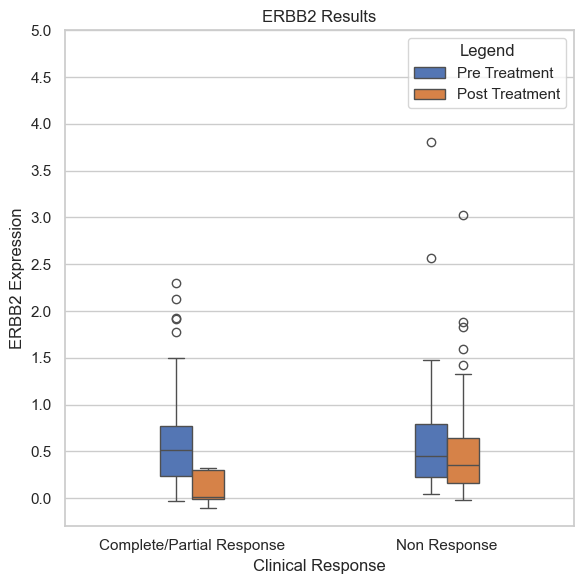

In [26]:
plot_complete_vs_non_response(pre_index=-9, post_index=-4, receptor="ERBB2", set_y_ticks=True, start=-0, end=5.5, step=0.5)

## ERBB3 Graph

Results for ERBB3
Non Pre Response  113
None Post Response  92
Complete Pre Response  93
Complete Post Response  5
Complete Response
T-statistic: 1.261353282980582
P-value: 0.006644781752557285
Non Response
T-statistic: 1.642840976677481
P-value: 0.0005992458824776194


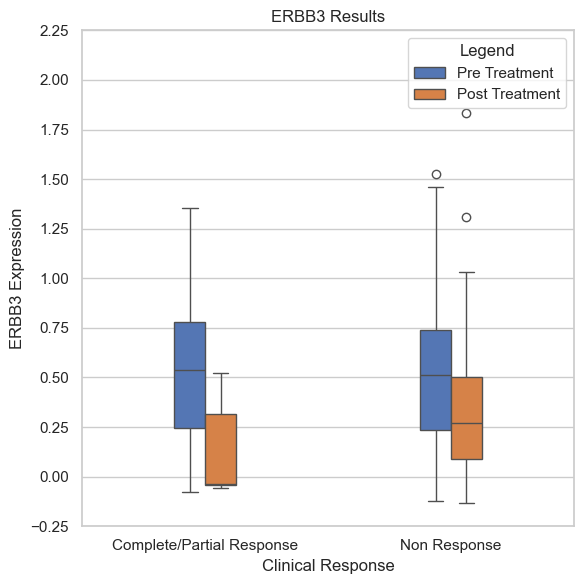

In [30]:
plot_complete_vs_non_response(pre_index=-8, post_index=-3, receptor="ERBB3",  set_y_ticks=True, start=-0.25, end=2.5, step=0.25)

## ERBB4 Graph

Results for ERBB4
Non Pre Response  113
None Post Response  92
Complete Pre Response  93
Complete Post Response  5
Complete Response
T-statistic: -0.08094904556802
P-value: 0.43586318345710107
Non Response
T-statistic: 0.019512134380877823
P-value: 0.4844546954643846


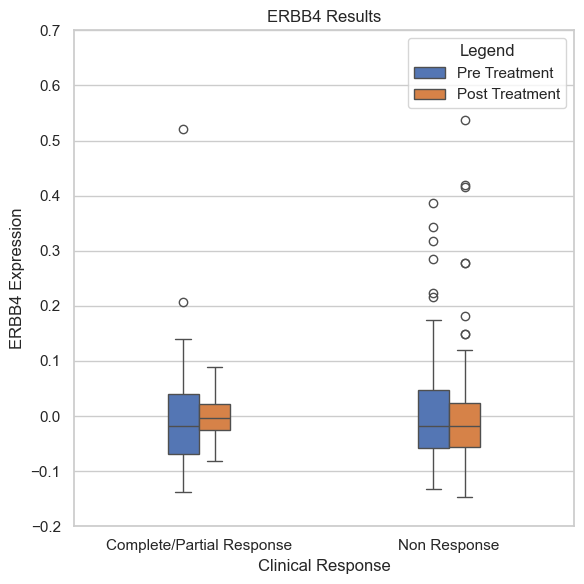

In [33]:
plot_complete_vs_non_response(pre_index=-7, post_index=-2, receptor="ERBB4", set_y_ticks=True, start=-0.2, end=0.8, step=0.1)

## EGFR Graph

Results for EGFR
Non Pre Response  113
None Post Response  92
Complete Pre Response  93
Complete Post Response  5
Complete Response
T-statistic: 0.4358851126830235
P-value: 0.19275438878969148
Non Response
T-statistic: -0.9598735787266158
P-value: 0.028145881818098867


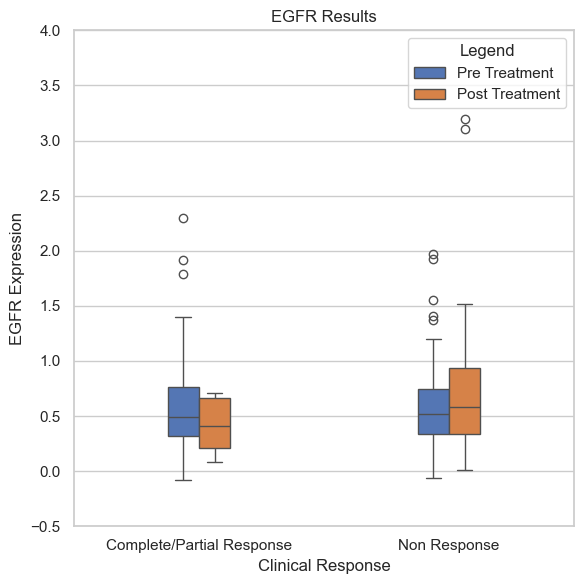

In [36]:
plot_complete_vs_non_response(pre_index=-6, post_index=-1, receptor="EGFR", set_y_ticks=True, start=-0.5, end=4.5, step=0.5)

# Cancer Stage Plots

## Cancer Stage Plots Code

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import sem, ttest_ind

def create_cancer_stage_plots(pre_index: int,
                                post_index: int, 
                                receptor: str, 
                                set_y_ticks: bool = False, 
                                start: int = 0, 
                                end: int = 1.0, 
                                step=0.1):
    file = Path("Data.csv")
    c_pre_labels = []
    c_post_labels = []
    n_pre_labels = []
    n_post_labels = []
    stage_index = 8

    group1 = ["pt1", "pt0", "pti", "ptis", "pta"]
    group2 = ["pt4", "pt3", "pt2"]

    with open(file, "r") as f:
        f.readline().split(",")
        
        for line in f:
            line = line.split(",")
            stage = line[stage_index][:3].lower()

            if stage in group1:
                if line[post_index].rstrip():
                    post_val = float(line[post_index].rstrip())
                    c_post_labels.append(post_val)
                if line[pre_index].rstrip():
                    pre_val = float(line[pre_index].rstrip())
                    c_pre_labels.append(pre_val)
            elif stage in group2:
                if line[post_index].rstrip():
                    post_val = float(line[post_index].rstrip())
                    n_post_labels.append(post_val)
                if line[pre_index].rstrip():
                    pre_val = float(line[pre_index].rstrip())
                    n_pre_labels.append(pre_val)
    
    print(f"Results for {receptor}")
    print("T0-T1 Pre Response ", len(c_pre_labels))
    print("T0-T1 Post Response ", len(c_post_labels))
    print("T2-T4 Pre Response ", len(n_pre_labels))
    print("T2-T4 Post Response ", len(n_post_labels))

    # Perform two-sample T-tests
    t_stat, p_value = ttest_ind(c_pre_labels, c_post_labels)
    print("T0-T1")
    print(f"T-statistic: {t_stat/2}")
    print(f"P-value: {p_value/2}")

    t_stat, p_value = ttest_ind(n_pre_labels, n_post_labels)
    print("T2-T4")
    print(f"T-statistic: {t_stat/2}")
    print(f"P-value: {p_value/2}")
    
    # Prepare data for box plot
    df = pd.DataFrame({
        f"{receptor} Expression": c_pre_labels + c_post_labels + n_pre_labels + n_post_labels,
        "Pathological T Stage": ["T0-T1"] * (len(c_pre_labels) + len(c_post_labels)) + ["T2-T4"] * (len(n_pre_labels) + len(n_post_labels)),
        "Condition": ["Pre Treatment"] * len(c_pre_labels) + ["Post Treatment"] * len(c_post_labels) + ["Pre Treatment"] * len(n_pre_labels) + ["Post Treatment"] * len(n_post_labels)
    })

    # Plotting
    sns.set(style="whitegrid")
    plt.figure(figsize=(6,6))
    bar_width = 0.25

    # Create Box Plot
    ax = sns.boxplot(x="Pathological T Stage", y=f"{receptor} Expression", hue="Condition", width=bar_width, data=df, palette=["#4472C4","#ED7D31"])

    # Setting the title, labels, and the legend
    ax.set_title(f"{receptor} Results")
    ax.set_xlabel("Pathological T Stage")
    ax.set_ylabel(f"{receptor} Expression")
    if set_y_ticks:
        ax.set_yticks(np.arange(start, end, step))

    plt.legend(title="Legend", loc="best")
    plt.tight_layout()

    plt.show()


## ERBB2 Graph

Results for ERRB2
T0-T1 Pre Response  135
T0-T1 Post Response  10
T2-T4 Pre Response  164
T2-T4 Post Response  122
T0-T1
T-statistic: 1.339246733117442
P-value: 0.004130901448006577
T2-T4
T-statistic: 1.2815328201590999
P-value: 0.005445315783190615


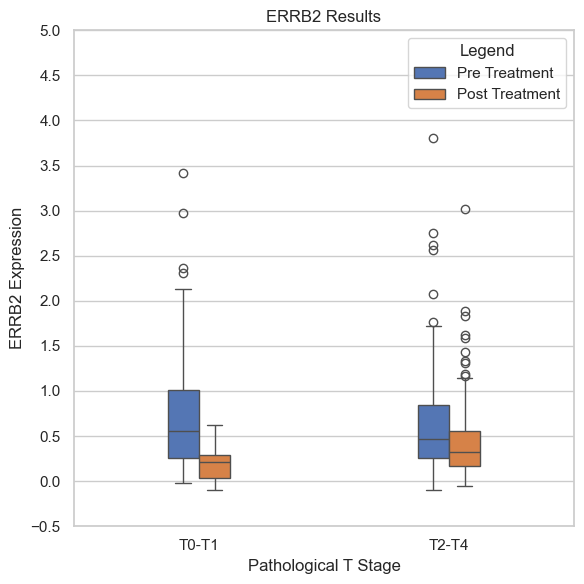

In [8]:
create_cancer_stage_plots(pre_index=-9, post_index=-4, receptor="ERRB2", set_y_ticks=True, start=-0.5, end=5.5, step=0.5)

## ERBB3 Graph

Results for ERRB3
T0-T1 Pre Response  135
T0-T1 Post Response  10
T2-T4 Pre Response  164
T2-T4 Post Response  122
T0-T1
T-statistic: 0.4419609121707422
P-value: 0.1891110537004898
T2-T4
T-statistic: 2.2257185036775464
P-value: 6.134147364887975e-06


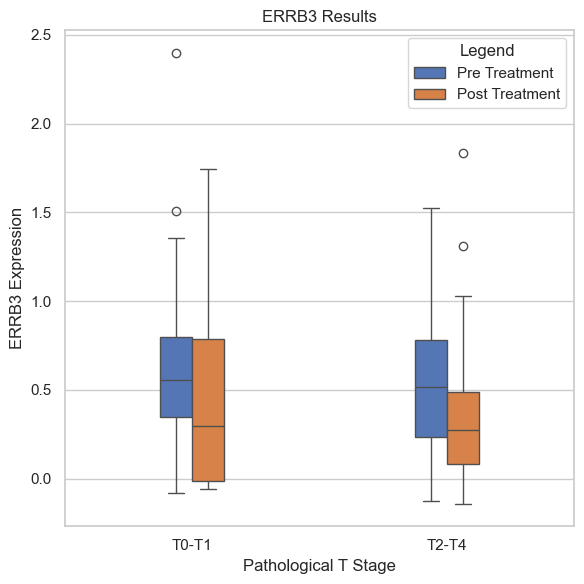

In [10]:
create_cancer_stage_plots(pre_index=-8, post_index=-3, receptor="ERRB3", set_y_ticks=False)

## ERBB4 Graph

Results for ERRB4
T0-T1 Pre Response  135
T0-T1 Post Response  10
T2-T4 Pre Response  164
T2-T4 Post Response  122
T0-T1
T-statistic: -0.2618016619931674
P-value: 0.30068248571378886
T2-T4
T-statistic: 0.0028102843483408316
P-value: 0.49775970231163014


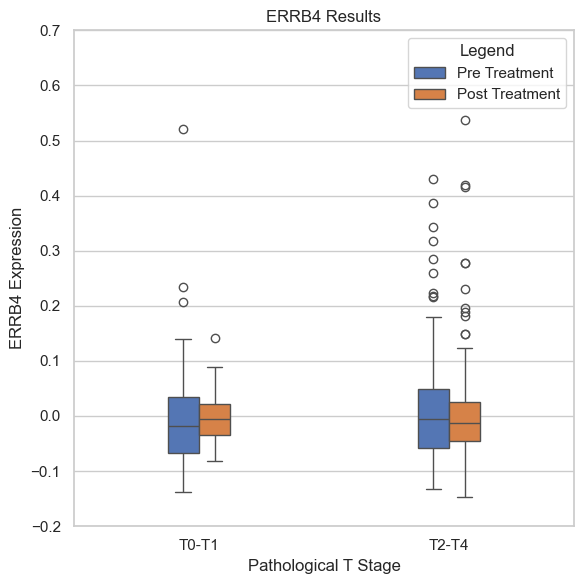

In [13]:
create_cancer_stage_plots(pre_index=-7, post_index=-2, receptor="ERRB4", set_y_ticks=True, start=-0.2, end=0.8, step=0.1)

## EGFR Graph

Results for EGFR
T0-T1 Pre Response  135
T0-T1 Post Response  10
T2-T4 Pre Response  164
T2-T4 Post Response  122
T0-T1
T-statistic: 0.6418859532190336
P-value: 0.10064901856182237
T2-T4
T-statistic: -0.9051568155864296
P-value: 0.03565198563885864


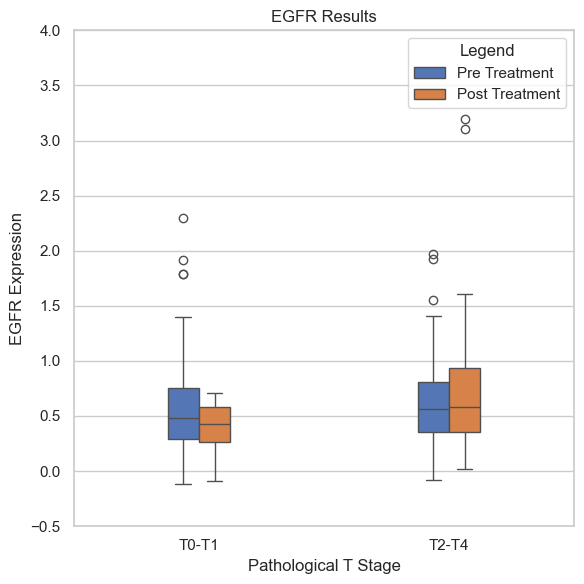

In [18]:
create_cancer_stage_plots(pre_index=-6, post_index=-1, receptor="EGFR", set_y_ticks=True, start=-0.5, end=4.5, step=0.5)